<h1>CONTENTS<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ATTRIBUTE-INFORMATION" data-toc-modified-id="ATTRIBUTE-INFORMATION-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ATTRIBUTE INFORMATION</a></span></li><li><span><a href="#IMPORTING-LIBRARIES" data-toc-modified-id="IMPORTING-LIBRARIES-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>IMPORTING LIBRARIES</a></span></li><li><span><a href="#IMPORTING-DATA" data-toc-modified-id="IMPORTING-DATA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>IMPORTING DATA</a></span></li><li><span><a href="#STATISTICAL-SUMMARY" data-toc-modified-id="STATISTICAL-SUMMARY-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>STATISTICAL SUMMARY</a></span></li><li><span><a href="#EXPLORATORY-DATA-ANALYSIS" data-toc-modified-id="EXPLORATORY-DATA-ANALYSIS-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EXPLORATORY DATA ANALYSIS</a></span><ul class="toc-item"><li><span><a href="#DATA-VISUALIZATION" data-toc-modified-id="DATA-VISUALIZATION-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>DATA VISUALIZATION</a></span></li><li><span><a href="#NAME-AND-GENDER" data-toc-modified-id="NAME-AND-GENDER-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>NAME AND GENDER</a></span></li><li><span><a href="#MOST-POPULAR-NAMES" data-toc-modified-id="MOST-POPULAR-NAMES-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>MOST POPULAR NAMES</a></span></li></ul></li><li><span><a href="#DATA-PREPROCESSING" data-toc-modified-id="DATA-PREPROCESSING-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>DATA PREPROCESSING</a></span><ul class="toc-item"><li><span><a href="#CHECKING-FOR-NULL-VALUES" data-toc-modified-id="CHECKING-FOR-NULL-VALUES-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>CHECKING FOR NULL VALUES</a></span></li><li><span><a href="#DATA-TRANSFORMATION" data-toc-modified-id="DATA-TRANSFORMATION-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>DATA TRANSFORMATION</a></span></li></ul></li><li><span><a href="#RANDOM-SAMPLING" data-toc-modified-id="RANDOM-SAMPLING-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>RANDOM SAMPLING</a></span></li><li><span><a href="#PREDICTIVE-ANALYSIS" data-toc-modified-id="PREDICTIVE-ANALYSIS-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>PREDICTIVE ANALYSIS</a></span><ul class="toc-item"><li><span><a href="#TUNING-ALL-THE-ALGORITHMS" data-toc-modified-id="TUNING-ALL-THE-ALGORITHMS-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>TUNING ALL THE ALGORITHMS</a></span></li><li><span><a href="#STACKING-CLASSIFIER" data-toc-modified-id="STACKING-CLASSIFIER-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>STACKING CLASSIFIER</a></span></li><li><span><a href="#ROC-CURVE" data-toc-modified-id="ROC-CURVE-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>ROC CURVE</a></span></li></ul></li></ul></div>

# SOURCE

    * This dataset combines raw counts for first/given names of male and female babies in those time periods, and then 
      calculates a probability for a name given the aggregate count.  Source datasets are from government authorities:
      
        -US: Baby Names from Social Security Card Applications - National Data, 1880 to 2019
        
        -UK:  Baby names in England and Wales Statistical bulletins, 2011 to 2018
        
        -Canada: British Columbia 100 Years of Popular Baby names, 1918 to 2018
        
        -Australia:  Popular Baby Names, Attorney-General's Department, 1944 to 2019
        
        
    * Gender by Name. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C55G7X.
    
    

        
# 
OBJECTIVE
    
        In this project, the objective is to conduct a classification predictive analysis using a dataset that combines 
        raw counts for first/given names of male and female babies from different countries and time periods. 

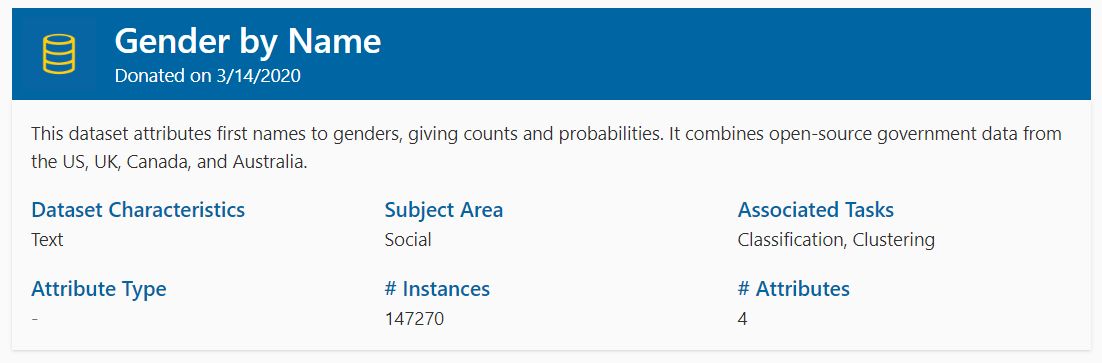

## ATTRIBUTE INFORMATION

        * Name:  String	
        
        * Gender:  M/F (category/string)
        
        * Count: Integer
        
        * Probability: Float      
        
            * Probability = Count of Name for a Specific Gender / Total Count of that Name
            
            * If the probability is close to 1 (or 100%), it suggests that the name is predominantly associated with that 
              gender in the dataset. 
              
              For example, if the probability of a name being female is 0.95, it indicates that the name is used primarily 
              for females in the dataset.
              
            * If the probability is close to 0 (or 0%), it suggests that the name is predominantly associated with the 
              opposite gender in the dataset. 
              
              For instance, if the probability of a name being male is 0.05, it indicates that the name is mostly used for 
              males in the dataset.
              
            * If the probability is around 0.5 (or 50%), it implies that the name is relatively gender-neutral or has an
              approximately equal likelihood of being used for both genders in the dataset.

## IMPORTING LIBRARIES

In [1]:
import warnings

import numpy as np

import pandas as pd

import sweetviz as sv

import seaborn as sns

import matplotlib.pyplot as plt

from wordcloud import WordCloud

from xgboost import XGBClassifier

warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE

from pandas_profiling import ProfileReport

pd.set_option('display.max_columns', None)

from sklearn.tree import DecisionTreeClassifier

from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression, Ridge, Lasso

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Normalizer

from sklearn.model_selection import train_test_split, GridSearchCV, KFold

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

## IMPORTING DATA

In [2]:
DF = pd.read_csv ( 'NAMES.csv' )

DF

,Name,Gender,Count,Probability
0,James,M,5304407,1.451679e-02
1,John,M,5260831,1.439753e-02
2,Robert,M,4970386,1.360266e-02
3,Michael,M,4579950,1.253414e-02
4,William,M,4226608,1.156713e-02
...,...,...,...,...
147264,Zylenn,M,1,2.736740e-09
147265,Zymeon,M,1,2.736740e-09
147266,Zyndel,M,1,2.736740e-09
147267,Zyshan,M,1,2.736740e-09


## STATISTICAL SUMMARY

In [3]:
Numeric_Statistical_Summary = DF.describe ( )

Numeric_Statistical_Summary

,Count,Probability
count,1.472690e+05,1.472690e+05
mean,2.481161e+03,6.790295e-06
std,4.645472e+04,1.271345e-04
min,1.000000e+00,2.736740e-09
25%,5.000000e+00,1.368370e-08
50%,1.700000e+01,4.652460e-08
75%,1.320000e+02,3.612500e-07
max,5.304407e+06,1.451679e-02


In [4]:
Categorical_Statistical_Summary = DF.describe ( include = 'object' , exclude = np.number )

Categorical_Statistical_Summary

,Name,Gender
count,147269,147269
unique,133910,2
top,James,F
freq,2,89749


## EXPLORATORY DATA ANALYSIS

### DATA VISUALIZATION 

In [5]:
Report = ProfileReport ( DF )

display(Report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

INFERENCE

    *  Count is highly overall correlated with Probability
    
    *  Count is highly skewed (γ1 = 62.07429414)
    
    *  Probability is highly skewed (γ1 = 62.07429429)

### NAME AND GENDER 

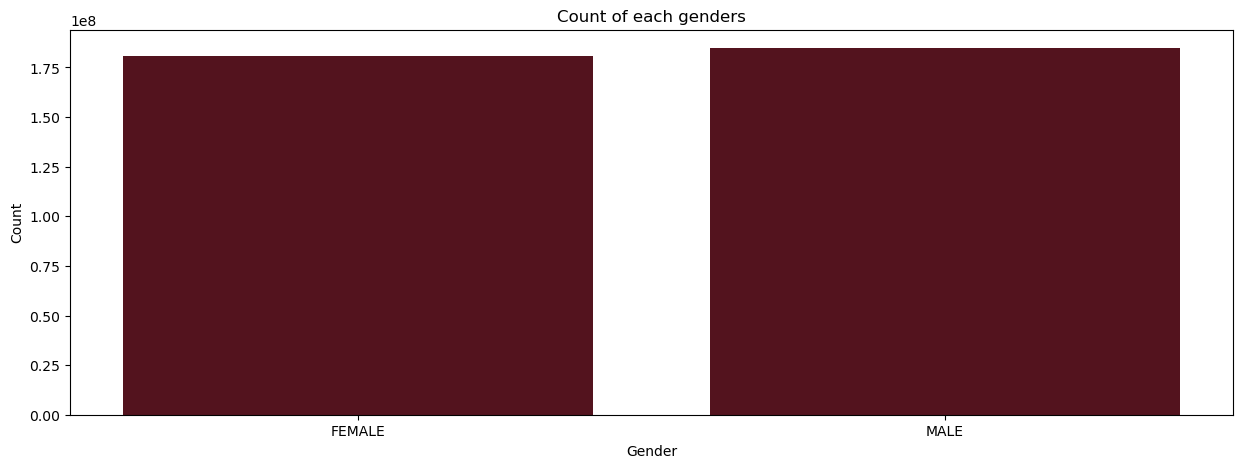

In [6]:
%matplotlib inline

# %matplotlib inline used to enable the inline plotting mode for Matplotlib, which means that the plots will be displayed 

# directly within the notebook interface, right below the code cell that generates them.

Count_DF = DF.groupby ( by = [ 'Gender' ] ).sum().reset_index ( ) 

plt.figure ( figsize = ( 15 , 5 ) )

plt.bar ( x = Count_DF.Gender , height = Count_DF.Count , color = '#53131E' )

plt.xlabel('Gender')

plt.ylabel('Count')

plt.title('Count of each genders')

plt.xticks ( ['F' , 'M'] , [ 'FEMALE' , 'MALE' ] )

plt.show ( )

### MOST POPULAR NAMES

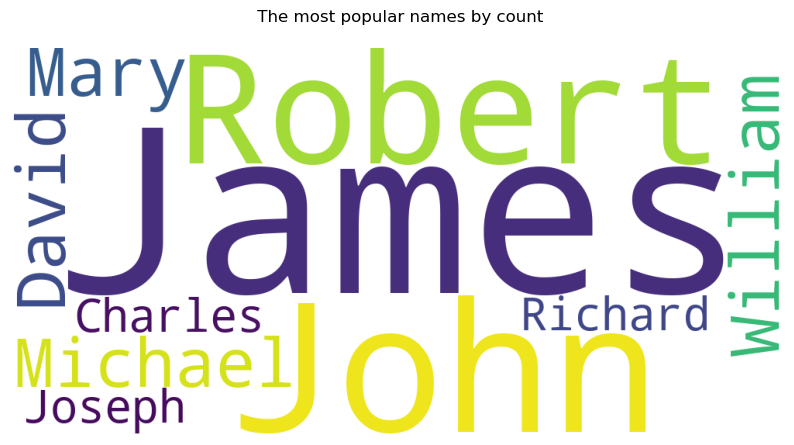

In [7]:
Popular_Names = WordCloud ( width = 1000 , height = 500 , background_color = 'white' ).generate_from_frequencies ( DF.nlargest ( columns = [ 'Count' ] , n = 10 ) [ 'Name' ].value_counts ( ) )

plt.figure( figsize = ( 10 , 6 ) )

plt.axis ( 'off')

plt.title ( " The most popular names by count\n " )

plt.imshow ( Popular_Names ) ;

plt.show ( )

## DATA PREPROCESSING 

### CHECKING FOR NULL VALUES

In [8]:
print ( 'The number of null values in each column of the data set is : ' )

DF.isnull ( ).sum ( ) 

The number of null values in each column of the data set is : 


Name           0
Gender         0
Count          0
Probability    0
dtype: int64

### DATA TRANSFORMATION

In [9]:
LE = LabelEncoder ( )

DF.Name = LE.fit_transform ( DF.Name )

DF.Gender = LE.fit_transform ( DF.Gender )

DF

,Name,Gender,Count,Probability
0,52308,1,5304407,1.451679e-02
1,57879,1,5260831,1.439753e-02
2,102035,1,4970386,1.360266e-02
3,84621,1,4579950,1.253414e-02
4,128418,1,4226608,1.156713e-02
...,...,...,...,...
147264,133797,1,1,2.736740e-09
147265,133823,1,1,2.736740e-09
147266,133843,1,1,2.736740e-09
147267,133892,1,1,2.736740e-09


In [10]:
print ( "The number of unique names in the data set is : " , DF.Name.nunique ( ) )

The number of unique names in the data set is :  133910


## RANDOM SAMPLING

In [11]:
Train , Test = train_test_split ( DF , random_state = 42 )

Train_X = Train.iloc [ : , [ 0 , 2 , 3 ] ]

Train_Y = Train [ 'Gender' ]

Test_X = Test.iloc [ : , [ 0 , 2 , 3 ] ]

Test_Y = Test [ 'Gender' ]

print ( "The shape of the sampled train and test data is as follows : \n " )

print ( "\nTrain : " , Train.shape , "\tTest : " , Test.shape )

print ( "\nTrain_X : " , Train_X.shape , "\tTrain_Y : " , Train_Y.shape )

print ( "\nTest_X : " , Test_X.shape , "\tTest_Y : " , Test_Y.shape )

The shape of the sampled train and test data is as follows : 
 

Train :  (110451, 4) 	Test :  (36818, 4)

Train_X :  (110451, 3) 	Train_Y :  (110451,)

Test_X :  (36818, 3) 	Test_Y :  (36818,)


## PREDICTIVE ANALYSIS

### TUNING ALL THE ALGORITHMS

In [12]:
LR = LogisticRegression (  )

RF = RandomForestClassifier (  )

DT = DecisionTreeClassifier (  )

GB = GradientBoostingClassifier (  )

XGB = XGBClassifier (  )

Parameters_LR = { 'max_iter' : [ 100 , 500 , 700 ]  }

Parameters_RF = { 'n_estimators' : [ 100 , 150 ] ,
                 
                  'criterion' : [ 'gini' , 'entropy' ] ,
                 
                  'max_depth' : [ None , 5 , 10 ]
                }

Parameters_DT = { 
                    'criterion' : [ 'gini' , 'entropy' ] , 
    
                    'max_depth' : [ None , 5 , 10 ] ,
    
                    'min_samples_split' : [ 2 , 5 , 7 ]
                }


Parameters_GB = { 
                    'max_depth' : [ 3 , 5 , 10 ] ,
    
                    'learning_rate' : [ 0.1 , 0.01 ],
    
                    'n_estimators' : [ 150 , 200 ]
                }

Parameters_XGB =  {
    
                  'n_estimators': [ 200 , 300 ],  

                  'learning_rate': [ 0.1, 0.01 ], 

                  'max_depth': [ 3 , 5 , 7 ]  
               }

Parameters = [ ( Parameters_LR , LR ) , ( Parameters_RF , RF ) , (Parameters_DT , DT ) , (Parameters_GB , GB ) , (Parameters_XGB , XGB ) ]

Best_Parameters = [ ]

for i in Parameters :
    
    GS = GridSearchCV ( estimator = i [ 1 ] , param_grid = i [ 0 ] , cv = 5 )
    
    GS.fit ( Train_X , Train_Y )
    
    print ( "\nThe algorithm is : " , i [ 1 ] )
    
    print ( "\nThe best Train accuracy is : " , GS.best_score_ * 100 )
    
    print ( "\nThe best parameters are : " , GS.best_params_ )
    
    print ( "----------------------------------------------------------------" )
    
    if i [ 1 ] == LR :
        
        LR = LogisticRegression ( **GS.best_params_ )
        
        Best_Parameters.append ( LR )
        
    elif i [ 1 ] == RF :
        
        RF = RandomForestClassifier ( **GS.best_params_ )
        
        Best_Parameters.append ( RF )

    elif i [ 1 ] == DT :
        
        DT = DecisionTreeClassifier ( **GS.best_params_ )
        
        Best_Parameters.append ( DT )
   
    elif i [ 1 ] == GB :

        GB = GradientBoostingClassifier ( **GS.best_params_ )

        Best_Parameters.append ( GB )
        
    elif i [ 1 ] == XGB :

        XGB = XGBClassifier ( **GS.best_params_ )

        Best_Parameters.append ( XGB )


The algorithm is :  LogisticRegression()

The best Train accuracy is :  60.87767436472442

The best parameters are :  {'max_iter': 100}
----------------------------------------------------------------

The algorithm is :  RandomForestClassifier()

The best Train accuracy is :  61.36929383764866

The best parameters are :  {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
----------------------------------------------------------------

The algorithm is :  DecisionTreeClassifier()

The best Train accuracy is :  62.12347289194481

The best parameters are :  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
----------------------------------------------------------------

The algorithm is :  GradientBoostingClassifier()

The best Train accuracy is :  64.00304129064563

The best parameters are :  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150}
----------------------------------------------------------------

The algorithm is :  XGBClassifier(base_sco

### STACKING CLASSIFIER

In [18]:
Best_Parameters = [ ( 'LR' , LR ) , ( 'DT' , DT ) , ( 'RF' , RF ) , ( 'GB' , GB ) , ( 'XGB' , XGB ) ]

CLF = StackingClassifier ( estimators = Best_Parameters , final_estimator = XGB )

CLF.fit ( Train_X , Train_Y )

StackingClassifier(estimators=[('LR', LogisticRegression()),
                               ('DT',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=10)),
                               ('RF', RandomForestClassifier(max_depth=10)),
                               ('GB',
                                GradientBoostingClassifier(max_depth=10,
                                                           n_estimators=150)),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsampl...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=7, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=300, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=None, ...))

In [19]:
Y_CLF = CLF.predict ( Test_X )

Accuracy_CLF = accuracy_score( Test_Y , Y_CLF ) * 100 

Precision_CLF = precision_score ( Test_Y , Y_CLF ) * 100 

Recall_CLF = recall_score ( Test_Y , Y_CLF ) * 100

F1_Score_CLF = f1_score ( Test_Y , Y_CLF ) * 100

print ( "The performance metrics of the Test Data is : \n" )

print ( "Accuracy = {}%\n\nPrecision = {}%\n\nRecall = {}%\n\nF1 Score = {}%".format ( Accuracy_CLF , Precision_CLF , Recall_CLF , F1_Score_CLF ) )

The performance metrics of the Test Data is : 

Accuracy = 64.64501059264491%

Precision = 57.74378585086042%

Recall = 33.75951931810243%

F1 Score = 42.608350601825315%


<AxesSubplot:>

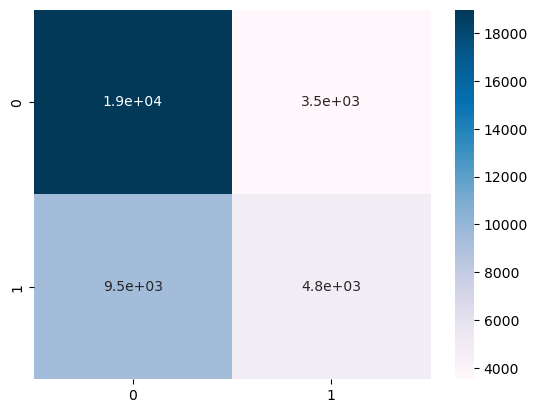

In [20]:
sns.heatmap ( confusion_matrix ( Test_Y , Y_CLF ) , cmap = 'PuBu' , annot = True )

### ROC CURVE

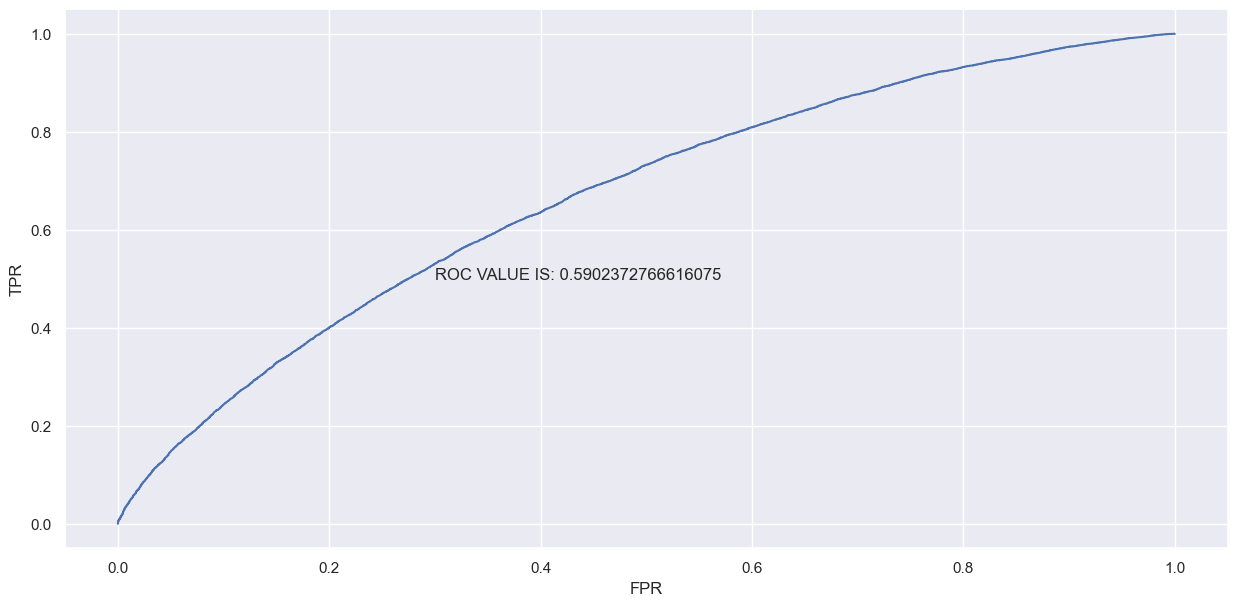

In [25]:
Predicted_Prob = CLF.predict_proba ( Test_X )

FPR, TPR, Threshold = roc_curve( Test_Y, Predicted_Prob [ : , 1 ] )

AUROC_Score = roc_auc_score( Test_Y , Y_CLF )

plt.style.use( "seaborn-dark" )

plt.figure ( figsize = ( 15 , 7 ) )

sns.set( style = 'darkgrid' )

plt.plot( FPR , TPR )

plt.xlabel( "FPR" )

plt.ylabel( "TPR" )

plt.text( x = 0.3, y = 0.5, s = "ROC VALUE IS: {}".format ( AUROC_Score ) )

plt.show ( )